## Inicialização

In [1]:
### Importando pacotes e definindo funções

In [2]:
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
import matplotlib.ticker as plticker
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os
from scipy import optimize
import SchemDraw as schem
import SchemDraw.elements as e

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

### Funções para desenhar circuitos

In [4]:
def DivTensao(Z1, Z2, fonte = [True,e.SOURCE_V], unit_size = 2.5, **kwargs):
    d = schem.Drawing(unit=unit_size, **kwargs)
    if fonte[0]:
        #fonte
        gnd1 = d.add(e.GND)
        d.add(fonte[1], label='$V_{Th}$')
        d.add(e.RES, d='right', label='$R_g$')
    #divisor de tensão
    vin = d.add(e.DOT_OPEN ,label='$V_{in}$')
    z1 = d.add(Z1[0], d='right',label='${}$'.format(Z1[1]))
    z2 = d.add(Z2[0], d='down',botlabel='${}$'.format(Z2[1]))
    gnd2 = d.add(e.GND)
    #output
    d.add(e.LINE, d='right', xy=z1.end, l=1)
    vout = d.add(e.DOT_OPEN, label='$V_{out}$')
    #loop
    d.labelI(z2, '$I$',top=False, arrowofst = 0.8, arrowlen = 0.75)
    return d

### Funções para gerar gráficos

In [5]:
def plot_load_lines(Vin=5,R1=100,R2=100):
  '''
  Função para ilustrar a solução das leis Kirchhoff 
  '''
  #limites dos eixos
  Vin_min, Vin_max = -6,6 # [V]
  I_min, I_max = -60,60 # [mA]
  #-------------
  I=np.linspace(I_min,I_max,100)
  #----------------------
  Vlhs = Vin-R1*I # equação LHS
  Vrhs = R2*I # equação RHS
  #----------------------
  fig_size = (10,5)
  fig,ax = plt.subplots(1,2,figsize=fig_size)
  #------------------
  ax0 = ax[0]
  DivTensao([e.RES,'R_1'],[e.RES,'R_2'],fonte = [False,e.SOURCE_V]).draw(ax=ax0)
  ax0.axes.get_xaxis().set_visible(False)
  ax0.axes.get_yaxis().set_visible(False)
  ax0.set_frame_on(False)
  ax0.set_xticklabels(())
  ax0.set_yticklabels(())
  ax0.get_figure().set_size_inches(fig_size[0],fig_size[1])
  #------------------
  ax0 = ax[1]
  ax0.plot(Vlhs,I*1e3, label = r'$V_{in}-R_1I-V(I)=0$')
  ax0.plot(Vrhs,I*1e3, label = r'$V(I)-R_2I=0$')
  #---
  #eixos x-y
  ax0.axhline(0, color='k', linestyle = '-',lw=2)
  ax0.axvline(0, color='k', linestyle = '-',lw=2)
  #---
  lab = '$V_{aberto}$'+'={} V'.format(Vin)
  ax0.scatter(Vin,0, color='b', marker='o', s=70, label=lab,zorder=3)
  lab = '$I_{curto}$'+'={:2.1f} mA'.format(1e3*Vin/R1)
  ax0.scatter(0,Vin/R1*1e3, color='b', marker='P', s=70, label=lab,zorder=3)
  #solução para corrente e tensão
  ax0.axhline(1e3*Vin/(R1+R2), c='k', ls = '--')
  ax0.axvline(Vin*R2/(R1+R2), c='k', ls = '--')
  lab = 'I,V={:2.1f} mA, {:2.1f} V'.format(1e3*Vin/(R1+R2),Vin*R2/(R1+R2))
  ax0.scatter(Vin*R2/(R1+R2),1e3*Vin/(R1+R2), c='r', marker='o', s=100, label=lab)
  #-----------------------
  ax0.set_xlabel('Tensão (V)')
  ax0.set_ylabel('Corrente (mA)')
  ax0.set_xlim([Vin_min,Vin_max])
  ax0.set_ylim([I_min,I_max])
  ax0.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
  ax0.grid(True,which='both')
  ax0.xaxis.set_major_locator(plticker.MultipleLocator(1))
  ax0.yaxis.set_major_locator(plticker.MultipleLocator(10))
  plt.show()

# Resolvendo a lei de Kirchhoff (KVL) graficamente



## Circuito divisor de tensão

Quando escreve-se a KVL para componentes cuja relação entre tensão e corrente é linear, geralmente é trivial resolver a lei de Kirchhoff. Por exemplo, considere o circuito abaixo:![alt text](https://)

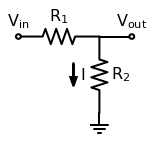

In [6]:
DivTensao([e.RES,'R_1'],[e.RES,'R_2'],fonte = [False,e.SOURCE_V]).draw()

Naturalmente a KVL resulta em $$V_{in}-R_1 I-R_2 I=0,$$ ou seja, $$I=\frac{V_{in}}{R_1+R_2}.$$
Suponha agora que não se sabe como se escrever a lei de Ohm para o resistor $R_2$, deixemos a tensão neste resistor como $V_{out}(I)$. A KVL neste caso poderia ser escrita na forma: $$V_{in}-R_1 I=V_{out}(I).$$
Temos duas funções da corrente, uma no lado esquerdo (LHS) e outro no lado direito (RHS). Se graficarmos ambas em um gráfico $I \times V$ temos:

In [7]:
interactive(plot_load_lines,Vin=(-5,5),R1=(1,300),R2=(1,300))

interactive(children=(IntSlider(value=5, description='Vin', max=5, min=-5), IntSlider(value=100, description='…

## Circuitos com diodo

Considere agora um circuito contendo um elemento cuja relação entre tensão e corrente é não-linear, por exempleo, um diodo. O caso do diodo fornece uma aplicação importante do método das curvas de carga discutido acima.
Quando se ignora efeitos de ruptura (breakdown),a corrente no diodo depende da tensão entre seus terminais da seguinte forma: $$I(V)=I_S (\exp\left(\frac{q V}{k_B T}\right)-1).$$
Sendo que,
* $I_S$ [A] é a tensão de saturação reversa (depende da temperatura);
* $k_B\approx1.38\times10^{-23} $ [J/K] é constante de Boltzmann;
* $T $ [K] é a temperatura da junção PN;
* $q\approx1.6\times 10^{-19} $ [C] é a carga do elétron.

Note que $q/(k_B T)\approx39.6\equiv \beta $ [C/J] para $T=293$ [K], portanto $I(V)=I_S (\exp(\beta V)-1).$